In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib
%matplotlib inline 

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
matches_df = pd.read_csv('data/matches.csv')
matches_df.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [3]:
matches_df.shape

(756, 18)

In [4]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [6]:
matches_df.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [7]:
df = matches_df.drop('umpire3', axis=1)
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


[Text(0.5, 0, 'Seasons'), Text(0, 0.5, 'No. of matches')]

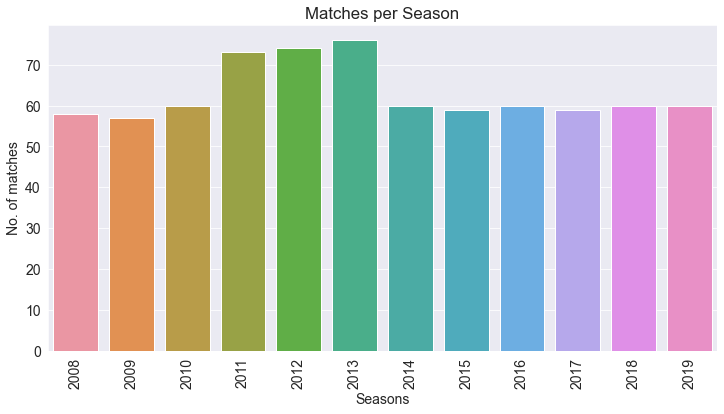

In [8]:
matches_season = df.groupby('season').id.count()

plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Matches per Season')
plot = sns.barplot(x=matches_season.index, y=matches_season)
plot.set(xlabel = 'Seasons', ylabel='No. of matches')

Text(0, 0.5, 'Percentage')

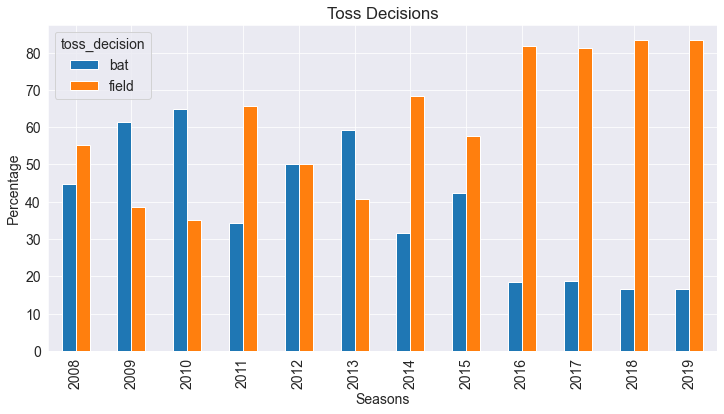

In [9]:
toss_percentage = matches_df.groupby('season')['toss_decision'].value_counts().sort_index()/matches_season*100
toss_percentage.unstack().plot(kind='bar', figsize=(12,6), title='Toss Decisions')
plt.xlabel('Seasons')
plt.ylabel('Percentage')

In [10]:
filter1 = (matches_df.win_by_wickets == 0) & (matches_df.result == 'normal')

In [11]:
wins_batting_first = matches_df[filter1].groupby('season')['winner'].count()/matches_season * 100
wins_batting_first

season
2008    41.379310
2009    47.368421
2010    51.666667
2011    45.205479
2012    45.945946
2013    48.684211
2014    36.666667
2015    54.237288
2016    35.000000
2017    44.067797
2018    46.666667
2019    36.666667
dtype: float64

In [12]:
filter2 = (matches_df.win_by_runs == 0) & (matches_df.result == 'normal')
wins_fielding_first = matches_df[filter2].groupby('season')['winner'].count()/matches_season * 100
wins_fielding_first

season
2008    58.620690
2009    50.877193
2010    46.666667
2011    53.424658
2012    54.054054
2013    48.684211
2014    61.666667
2015    40.677966
2016    65.000000
2017    54.237288
2018    53.333333
2019    58.333333
dtype: float64

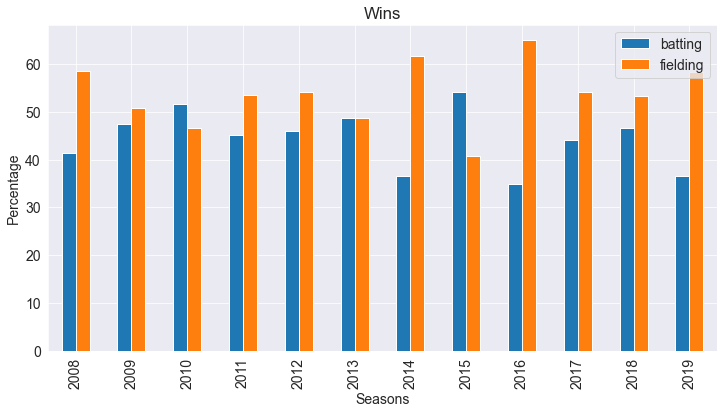

In [13]:
wins_df = pd.concat([wins_batting_first, wins_fielding_first], axis=1)
wins_df.columns = ['batting', 'fielding']
wins_df.plot(kind='bar', figsize=(12,6), title='Wins')
plt.xlabel('Seasons')
plt.ylabel('Percentage')
plt.show()

In [14]:
played_df = (matches_df.team2.value_counts() + matches_df.team1.value_counts()).sort_values(ascending=False)
played_df

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Delhi Capitals                  16
Rising Pune Supergiants         14
Kochi Tuskers Kerala            14
dtype: int64

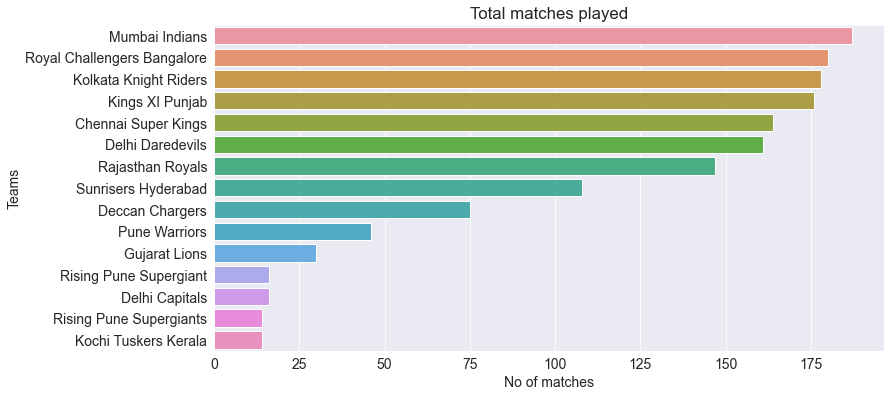

In [15]:
plt.figure(figsize=(12,6))
plt.title('Total matches played')
matches_plot = sns.barplot(y=played_df.index, x=played_df)
plt.xlabel('No of matches')
plt.ylabel('Teams')
plt.show()

Text(0, 0.5, 'Wins')

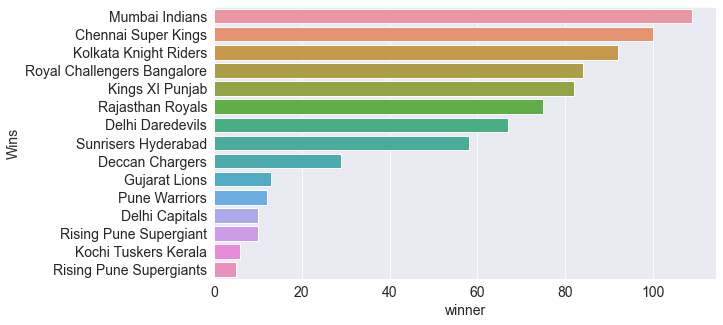

In [16]:
most_wins = matches_df['winner'].value_counts()
sns.barplot(y=most_wins.index, x=most_wins)
plt.ylabel('Wins')

Text(0, 0.5, 'Win percentage')

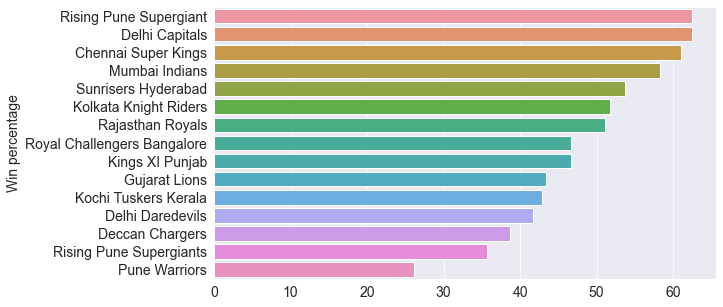

In [17]:
win_percentage = (most_wins/played_df).sort_values(ascending=False)*100
sns.barplot(y=win_percentage.index, x=win_percentage)
plt.ylabel('Win percentage')

<AxesSubplot:xlabel='winner'>

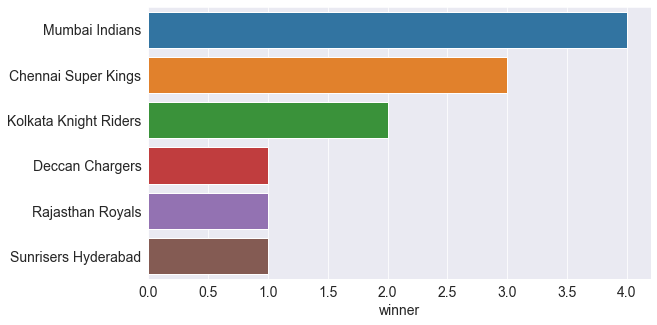

In [18]:
ipl_win = matches_df.groupby('season').tail(1).sort_values('season', ascending=True)
ipl_winners = ipl_win.winner.value_counts()
sns.barplot(y=ipl_winners.index, x=ipl_winners)

In [19]:
matches_each_season = pd.crosstab(matches_df['winner'], matches_df['season'])
matches_each_season

season,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
winner,,,,,,,,,,,,
Chennai Super Kings,9,8,9,11,10,12,10,10,0,0,11,10
Deccan Chargers,2,9,8,6,4,0,0,0,0,0,0,0
Delhi Capitals,0,0,0,0,0,0,0,0,0,0,0,10
Delhi Daredevils,7,10,7,4,11,3,2,5,7,6,5,0
Gujarat Lions,0,0,0,0,0,0,0,0,9,4,0,0
Kings XI Punjab,10,7,4,7,8,8,12,3,4,7,6,6
Kochi Tuskers Kerala,0,0,0,6,0,0,0,0,0,0,0,0
Kolkata Knight Riders,6,3,7,8,12,6,11,7,8,9,9,6
Mumbai Indians,7,5,11,10,10,13,7,10,7,12,6,11


<AxesSubplot:xlabel='season', ylabel='winner'>

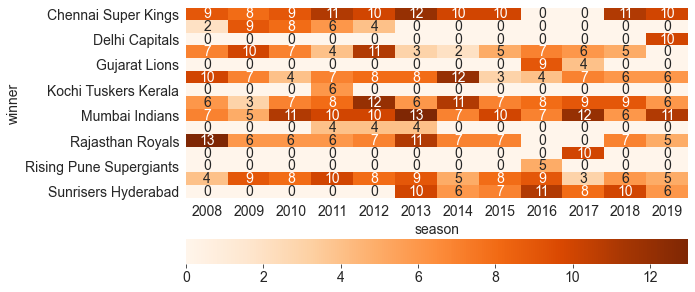

In [20]:
sns.heatmap(matches_each_season, annot=True, cmap='Oranges', fmt='d', cbar_kws={'orientation':'horizontal'})

In [26]:
highest_wins_runs = matches_df[matches_df['win_by_runs'] != 0].sort_values('win_by_runs', ascending=False)
highest_wins_runs


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,NaN
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
556,557,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,NaN
410,411,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
614,615,2016,Chandigarh,2016-05-09,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,1,0,SR Watson,"Punjab Cricket Association IS Bindra Stadium, ...",AK Chaudhary,HDPK Dharmasena,NaN
598,599,2016,Delhi,2016-04-27,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Gujarat Lions,1,0,CH Morris,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
163,164,2009,Johannesburg,2009-05-17,Kings XI Punjab,Deccan Chargers,Deccan Chargers,field,normal,0,Kings XI Punjab,1,0,Yuvraj Singh,New Wanderers Stadium,S Ravi,RB Tiffin,NaN


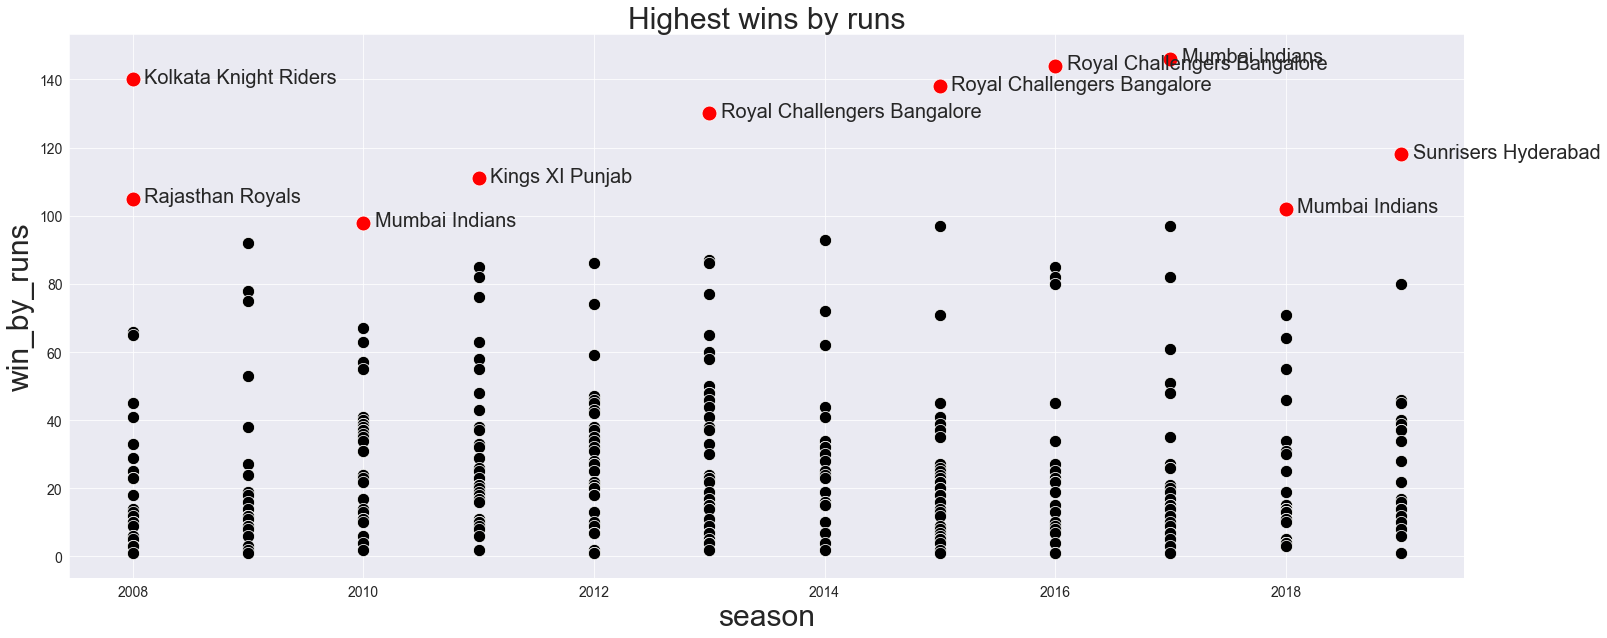

In [32]:
plt.figure(figsize=(25,10))
plt.xlabel('Seasons', size=30)
plt.ylabel('Runs', size=30)
plt.title('Highest wins by runs', size=30)
sns.scatterplot(x='season',y='win_by_runs', data=highest_wins_runs, s=150, color='black')
sns.scatterplot(x='season', y='win_by_runs', data=highest_wins_runs.head(10),s=220, color='red')
for i in range(highest_wins_runs.head(10).shape[0]):
    plt.annotate(highest_wins_runs.winner.tolist()[i], (highest_wins_runs.season.tolist()[i]+0.1, highest_wins_runs.win_by_runs.tolist()[i] - 1) , size = 20)

In [39]:
top_2 = matches_df[((matches_df.team1=='Mumbai Indians') & (matches_df.team2=='Chennai Super Kings')) | ((matches_df.team1=='Chennai Super Kings') & (matches_df.team2=='Mumbai Indians'))]
top_2.winner.value_counts()

Mumbai Indians         17
Chennai Super Kings    11
Name: winner, dtype: int64